## Initialization

### Import Modules

In [5]:
import os
import cv2
import glob
import imutils
import argparse
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import splitfolders

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from skimage.feature import hog
from sklearn.metrics import classification_report

### Variables

In [7]:
data_path = r"C:\\Users\SMSK_Narinda\Desktop\Research\dataset"
img_size = 128
num_classes = 23
EPOCHS = 20
BATCH_SIZE = 64
subfolders= [os.path.join(data_path, d) for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))]

### Load label

In [8]:
labels = []

for label in subfolders:
    print(os.path.normcase(label))
    labels.append(label)

c:\\users\smsk_narinda\desktop\research\dataset\acne and rosacea photos
c:\\users\smsk_narinda\desktop\research\dataset\actinic keratosis basal cell carcinoma and other malignant lesions
c:\\users\smsk_narinda\desktop\research\dataset\atopic dermatitis photos
c:\\users\smsk_narinda\desktop\research\dataset\bullous disease photos
c:\\users\smsk_narinda\desktop\research\dataset\cellulitis impetigo and other bacterial infections
c:\\users\smsk_narinda\desktop\research\dataset\eczema photos
c:\\users\smsk_narinda\desktop\research\dataset\exanthems and drug eruptions
c:\\users\smsk_narinda\desktop\research\dataset\hair loss photos alopecia and other hair diseases
c:\\users\smsk_narinda\desktop\research\dataset\herpes hpv and other stds photos
c:\\users\smsk_narinda\desktop\research\dataset\light diseases and disorders of pigmentation
c:\\users\smsk_narinda\desktop\research\dataset\lupus and other connective tissue diseases
c:\\users\smsk_narinda\desktop\research\dataset\melanoma skin cancer

### Load Images

Berlaku untuk Cara 1 dan 2 saja :D

In [9]:
def extract_color_histogram(image, bins=(32,32,32)):
    ###extract 3d color
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0,1,2], None, bins,
                       [0, 180, 0 , 256, 0, 256])
    
    ### handle normalizing the historigram
    if imutils.is_cv2():
        hist = cv2.normalize(hist)
    
    else :
        cv2.normalize(hist,hist)
        
    return hist.flatten()

In [13]:
def image_2_feature_vector(image, dsize=(100,100)):
    ###resize image to be fixed size, flatten image into raw pixel
    return cv2.resize(image, dsize).flatten()

In [159]:
### initialize the raw pixel intensities matrix
rawImages =[]
features = []
labels = []

In [160]:
for i in range (1,8):
    print("[INFO] iteration number = ", i)
    for classes in subfolders:
        # Mendapatkan label dari nama subfolder
        label = classes.split(os.path.sep)[-1]
        print("Processing for label " + label)
        for filename in os.scandir(classes):
            if filename.is_file():
                # Mendapatkan path file dari objek filename
                image_path = filename.path
                # Membaca gambar dari path file
                image = cv2.imread(image_path)
                # Mendapatkan label dari nama subfolder
                label = classes.split(os.path.sep)[-1]
    
                # Ekstrak fitur dari gambar dan histogram warna
                # pixels = image_2_feature_vector(image)
                hist = extract_color_histogram(image)
    
                # Menambahkan fitur dan label ke dalam list yang sesuai
                # rawImages.append(pixels)
                features.append(hist)
                labels.append(label)
    print("[STOP] \n")

[INFO]  1
[INFO] Processing for label C:\\Users\SMSK_Narinda\Desktop\Research\dataset\Acne and Rosacea Photos
[INFO] Processing for label C:\\Users\SMSK_Narinda\Desktop\Research\dataset\Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions
[INFO] Processing for label C:\\Users\SMSK_Narinda\Desktop\Research\dataset\Atopic Dermatitis Photos
[INFO] Processing for label C:\\Users\SMSK_Narinda\Desktop\Research\dataset\Bullous Disease Photos
[INFO] Processing for label C:\\Users\SMSK_Narinda\Desktop\Research\dataset\Cellulitis Impetigo and other Bacterial Infections
[INFO] Processing for label C:\\Users\SMSK_Narinda\Desktop\Research\dataset\Eczema Photos
[INFO] Processing for label C:\\Users\SMSK_Narinda\Desktop\Research\dataset\Exanthems and Drug Eruptions
[INFO] Processing for label C:\\Users\SMSK_Narinda\Desktop\Research\dataset\Hair Loss Photos Alopecia and other Hair Diseases
[INFO] Processing for label C:\\Users\SMSK_Narinda\Desktop\Research\dataset\Herpes HPV and other ST

In [161]:
print("[INFO] processed {}/{}".format(len(labels), len(subfolders)))

[INFO] processed 135023/23


In [162]:
# rawImages = np.array(rawImages)
features = np.array(features)
labels = np.array(labels)

In [164]:
# print("[INFO] pixels matrix: {:.2f}MB".format(
# 	rawImages.nbytes / (1024 * 1000.0)))
print("[INFO] features matrix: {:.2f}MB".format(
	features.nbytes / (1024 * 1000.0)))

[INFO] features matrix: 17282.94MB


In [165]:
# (trainRI, testRI, trainRL, testRL) = train_test_split(
# 	rawImages, labels, test_size=0.3, random_state=42)
(trainFeat, testFeat, trainLabels, testLabels) = train_test_split(
	features, labels, test_size=0.3, random_state=42)

In [166]:
ap = argparse.ArgumentParser()
args = ap.parse_args(args=[])
ap.add_argument("-k", "--neighbors", type=int, default=4,
	help="# of nearest neighbors for classification")
args = ap.parse_args(args=[])

## KNN Classifier

### Cara 1 KNN Classifier

Source : https://github.com/BenJamesbabala/Image_Classification_with_5_methods/blob/master/src_code/method1/test.py
https://github.com/Apress/advanced-data-analytics-using-python/blob/master/knn_classifier.py


In [35]:
# k-NN raw Images

print("[INFO] evaluating raw pixel accuracy...")
modelRI = KNeighborsClassifier(n_neighbors=args.neighbors)
modelRI.fit(trainRI, trainRL)
accRI = modelRI.score(testRI, testRL)
print("[INFO] k-NN classifier: k=%d" % args.neighbors)
print("[INFO] raw pixel accuracy: {:.2f}%".format(accRI * 100))

[INFO] evaluating raw pixel accuracy...
[INFO] k-NN classifier: k=4
[INFO] raw pixel accuracy: 94.80%


In [36]:
# Evaluasi KNN cara 1 RawImages K-fold Cross Validation

scores = cross_val_score(modelRI, trainRI, trainRL, cv=5, scoring='accuracy')
print("Accuracy : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy : 0.88 (+/- 0.01)


In [37]:
print("[RESULT] score mean: " )
print(scores.mean())

[RESULT] score mean: 
0.8781898937285657


### Cara 2 KNN Classifier Histogram (ekstraksi warna) K-fold Cross Validation

In [1]:
(trainFeat, testFeat, trainLabels, testLabels) = train_test_split(
	features, labels, test_size=0.3, random_state=42)

NameError: name 'train_test_split' is not defined

In [168]:
# k-NN Historigram

print("[INFO] evaluating histogram accuracy...")
modelFeat = KNeighborsClassifier(n_neighbors=args.neighbors)
modelFeat.fit(trainFeat, trainLabels)
acc = modelFeat.score(testFeat, testLabels)
print("[INFO] k-NN classifier: k=%d" % args.neighbors)
print("[INFO] histogram accuracy: {:.2f}%".format(acc * 100))

[INFO] evaluating histogram accuracy...
[INFO] k-NN classifier: k=4
[INFO] histogram accuracy: 94.98%


In [ ]:
# Evaluasi KNN cara 2 Histogram K-fold Cross Validation
scores = cross_val_score(modelFeat, trainFeat, trainLabels, cv=5, scoring='accuracy')
print("[RESULT] Accuracy : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

In [ ]:
print("[RESULT] score mean: " )
print(scores.mean())

In [ ]:
(x_train, X_val, y_train, y_val) = train_test_split(
    trainFeat, trainLabels, test_size=0.1, random_state=42)

In [ ]:
prediction = modelFeat.predict(testFeat)
accuracy_score(testLabels, prediction)

In [ ]:
# Initialize lists to store training and validation accuracy
train_accuracy = []
val_accuracy = []

# Specify different values of K (number of neighbors)
k_values = [1, 4, 5, 7, 9]

# Train KNN models with different values of K
for k in k_values:
    print("[INFO] Processing on ", k, "values")
    modelFeat = KNeighborsClassifier(n_neighbors=k)
    knn = modelFeat
    knn.fit(trainFeat, trainLabels)
    
    # Evaluate training accuracy
    train_pred = knn.predict(testFeat)
    train_acc = accuracy_score(testLabels, train_pred)
    print("[INFO] Training Accuracy =", train_acc)
    train_accuracy.append(train_acc)
    
    # Evaluate validation accuracy
    val_pred = knn.predict(X_val)
    val_acc = accuracy_score(y_val, val_pred)
    print("[INFO] Validation Accuracy =", val_acc)
    val_accuracy.append(val_acc)

print("[STOP]")

In [ ]:
plt.plot(k_values, train_accuracy, label='Training Accuracy')
plt.plot(k_values, val_accuracy, label='Validation Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Number of Neighbors')
plt.legend()
plt.show()

In [116]:
error_rate = []

for i in range(1, 5):
    y_pred = knn.predict(X_test)
    error_rate = 1.0 - accuracy_score(y_test, y_pred)
    error_rate.append(np.mean(y_pred != y_test))  # Use ravel to flatten both arrays

ValueError: operands could not be broadcast together with shapes (5787,) (189628416,) 

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [108]:
y_test_arg=np.argmax(testLabels,axis=1)
Y_pred = np.argmax(model.predict(trainFeat),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize a KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=5)

# Assuming you have your training and testing data
X_train, y_train = ...
X_test, y_test = ...

# Train the model
knn.fit(X_train, y_train)

# Get predictions on the test set
y_pred = knn.predict(X_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Model Evaluation


Debugging the model involves carefully examining the model's behavior, predictions, and training process to identify any issues or errors. Here are some steps you can take to debug the model:

Print Debugging Information: Insert print statements throughout the code to output relevant information such as the shapes of input data, predictions, labels, and intermediate variables. This can help you understand how the data flows through the model and identify any inconsistencies or unexpected behavior.

Check Model Architecture: Verify the architecture of the model, including the number of input and output units, layer sizes, activation functions, etc. Ensure that the model architecture matches the problem you're trying to solve and that it's suitable for the input data.

Inspect Model Predictions: Examine the predictions made by the model to identify any patterns or discrepancies. Print or visualize the predictions alongside the corresponding true labels to compare them and identify any mismatches.

Evaluate Loss and Metrics: Monitor the loss function and evaluation metrics (e.g., accuracy, precision, recall) during training and validation. Check if the loss decreases over epochs and if the metrics improve. If the loss or metrics behave unexpectedly, it could indicate issues with the model's learning process.

Plot Training History: Visualize the training history (e.g., training and validation loss, accuracy) using plots or graphs. Plotting the training history can help you identify trends, overfitting, or underfitting issues.

Check Gradient Flow: If training with gradient-based optimization algorithms (e.g., SGD, Adam), inspect the gradients to ensure they're not vanishing or exploding. Print or visualize the gradients to understand their magnitude and direction during training.

Validate Inputs and Outputs: Validate the input and output data fed into the model. Check for any missing values, NaNs, or outliers in the input data. Ensure that the model's predictions and outputs are within the expected range and format.

Experiment with Hyperparameters: Experiment with different hyperparameters (e.g., learning rate, batch size, regularization strength) to see if changing them improves the model's performance or stability. Use techniques like grid search or random search to explore the hyperparameter space efficiently.

Inspect Model Layers: If using deep learning models, inspect the intermediate layers and activations to understand how the model transforms the input data. Visualize feature maps, activations, or gradients to gain insights into the model's internal representations.

Compare with Baseline Models: Compare the performance of your model with baseline models or simpler algorithms to establish a baseline and evaluate whether the complexity of your model is justified.

By systematically debugging the model and carefully examining its behavior at each step, you can identify and address any issues or errors that may arise during training or prediction. Remember to document your debugging process and observations to facilitate troubleshooting and future improvements to the model.





In [129]:
# Example: Printing shapes of input data, predictions, and labels
print("Shape of testFeat:", testFeat.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of predictions (pred_i):", pred_i.shape)

Shape of testFeat: (5787, 32768)
Shape of y_test: (5787, 32768)
Shape of predictions (pred_i): (5787,)


In [143]:
# Check Model Architecture
# Example: Inspecting the model architecture
print("Model Parameters:")
for param_name, param_value in modelFeat.get_params().items():
    print(param_name, ":\t", param_value)

# Check Gradient Flow
# Example: Inspecting gradients during training
# (Assuming using scikit-learn)
print("No gradients to inspect in scikit-learn models.")

# Inspect Model Layers
# Example: Unable to inspect layers directly in scikit-learn
print("Unable to inspect layers directly in scikit-learn models.")

# Validate Inputs and Outputs
# Example: Checking for missing values or outliers in input data
print("Missing Values in testFeat:", np.isnan(testFeat).sum())
print("Outliers in testFeat:", np.any(testFeat > 100))  # Example threshold for outliers


Model Parameters:
algorithm :	 auto
leaf_size :	 30
metric :	 minkowski
metric_params :	 None
n_jobs :	 None
n_neighbors :	 4
p :	 2
weights :	 uniform
No gradients to inspect in scikit-learn models.
Unable to inspect layers directly in scikit-learn models.
Missing Values in testFeat: 0
Outliers in testFeat: False


In [132]:
# Example: Comparing predictions with true labels
for i in range(len(pred_i)):
    print("Prediction:", pred_i[i], " - True Label:", y_test[i])

Prediction: Cellulitis Impetigo and other Bacterial Infections  - True Label: [0.00023833 0.         0.         ... 0.         0.         0.        ]
Prediction: Tinea Ringworm Candidiasis and other Fungal Infections  - True Label: [2.8019393e-05 2.2415514e-04 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00]
Prediction: Acne and Rosacea Photos  - True Label: [0. 0. 0. ... 0. 0. 0.]
Prediction: Atopic Dermatitis Photos  - True Label: [0.0000000e+00 3.6015027e-04 4.5018784e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00]
Prediction: Psoriasis pictures Lichen Planus and related diseases  - True Label: [0.00014773 0.00098484 0.00285605 ... 0.         0.         0.        ]
Prediction: Warts Molluscum and other Viral Infections  - True Label: [0. 0. 0. ... 0. 0. 0.]
Prediction: Acne and Rosacea Photos  - True Label: [0. 0. 0. ... 0. 0. 0.]
Prediction: Psoriasis pictures Lichen Planus and related diseases  - True Label: [5.6861043e-01 3.1424861e-03 1.7957063e-04 ... 0.0000000

### Cara 3 KNN Classifier

Source : https://jurnal.mdp.ac.id/index.php/algoritme/article/view/2362/721

In [ ]:
HOGfeatures = []
labels = []

In [ ]:
for classes in subfolders:
    print("[INFO] Processing for label " + classes)
    for filename in os.scandir(classes):
        if filename.is_file():
            # Mendapatkan path file dari objek filename
            image_path = filename.path
            # Membaca gambar dari path file
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            # Mengubah ukuran gambar
            image_resized = cv2.resize(image, (224, 224))
            # Mendapatkan label dari nama subfolder
            label = classes.split(os.path.sep)[-1]

            # Ekstrak fitur HOG
            hog_features = hog(image_resized, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)

            # Menambahkan fitur dan label ke dalam list yang sesuai
            HOGfeatures.append(hog_features)
            labels.append(subfolders.index(classes))
    print("[STOP] \n")

In [ ]:
HOGfeatures = np.array(HOGfeatures)
labels = np.array(labels)

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(
	HOGfeatures, labels, test_size=0.15, random_state=42)

In [ ]:
# k-NN HSV & HOG

print("[INFO] evaluating HOG accuracy...")
model = KNeighborsClassifier(n_neighbors=args.neighbors)
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
print("[INFO] k-NN classifier: k=%d" % args.neighbors)
print("[INFO] HOG accuracy: {:.2f}%".format(acc * 100))

In [ ]:
# Evaluasi KNN cara 3 Histogram K-fold Cross Validation

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Accuracy : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

In [ ]:
print("[RESULT] score mean: " )
print(scores.mean())

## Source Side Code

### Elbow Method

In [ ]:
# Preprocessing
rawImages = rawImages/255.0
reshaped_rawImages = rawImages.reshape(len(rawImages), -1)
reshaped_rawImages.shape

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 23, random_state = 0)
clusters = kmeans.fit_predict(reshaped_rawImages)
kmeans.cluster_centers_.shape

In [ ]:

# Membuat x_data berdasarkan jumlah fitur (49152)
x_data = np.arange(49152)

# Menghasilkan palet warna dengan 23 warna
colors = plt.cm.jet(np.linspace(0, 1, 23))

# Membuat scatter plot untuk setiap cluster
plt.figure(figsize=(10, 6))
for i in range(23):
    plt.scatter(x_data, kmeans.cluster_centers_[i], color=colors[i], alpha=0.01, s=20)  # Mengurangi alpha dan meningkatkan s

plt.xlabel('Features')
plt.ylabel('Cluster Centers')
plt.title('Cluster Centers for KMeans Clustering (n_clusters=23)')
plt.show()

In [ ]:
# mapping labels from cluster to original labels
def get_reference_dict(clusters,labels):
    reference_label = {}
    # For loop to run through each label of cluster label
    for i in range(len(np.unique(clusters))):
        index = np.where(clusters == i,1,0)
        num = np.bincount(labels[index==1]).argmax()
        reference_label[i] = num
    return reference_label
    
# Mapping predictions to original labels
def get_labels(clusters,labels):
    temp_labels = np.random.rand(len(clusters))
    for i in range(len(clusters)):
        temp_labels[i] = reference_labels[clusters[i]]
    return temp_labels

In [ ]:
reference_labels = get_reference_dict(clusters,labels)
predicted_labels = get_labels(clusters,reference_labels)
print(accuracy_score(predicted_labels,labels))

### Confussion Matrix

Source : https://medium.com/analytics-vidhya/how-to-create-a-confusion-matrix-with-the-test-result-in-your-training-model-802b1315d8ee

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### K Fold Cross Validation

Source:
https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/

In [ ]:
knn = KNeighborsClassifier(n_neighbors=24)
scores = cross_val_score(knn, X_train, y_train, cv=24, scoring='accuracy')
print("Accuracy : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

### Split Class

In [ ]:
splitfolders.ratio(data_path, output="dataset2",
                  seed=42,
                  ratio=(.7, .2, .1),
                  group_prefix = None)

splitfolders.fixed(data_path, output="dataset2",
                   seed=42,
                  fixed=(200, 200, 100),
                  oversample=True,
                  group_prefix=None)

### Looking for best K value

In [76]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = []
y_train_folds = []

X_train_folds = np.array_split(x_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)

In [100]:
def compute_distances_no_loops(self, X):
    """
    Compute the distance between each test point in X and each training point
    in self._fit_X using no explicit loops.

    Input / Output: Same as compute_distances_two_loops
    """
    num_test = X.shape[0]
    num_train = self._fit_X.shape[0]
    dists = np.zeros((num_test, num_train)) 

    #########################################################################
    # Compute the l2 distance between all test points and all training
    # points without using any explicit loops, and store the result in
    # dists.
    #
    # You should implement this function using only basic array operations;
    # in particular you should not use functions from scipy.
    #
    # HINT: Try to formulate the l2 distance using matrix multiplication
    #       and two broadcast sums.
    #########################################################################

    # Compute squared Euclidean distances
    dot_prod = np.dot(X, self._fit_X.T)
    sum_square_test = np.sum(X ** 2, axis=1, keepdims=True)
    sum_square_train = np.sum(self._fit_X ** 2, axis=1)
    dists = np.sqrt(np.maximum(-2 * dot_prod + sum_square_test + sum_square_train, 0))

    return dists


In [102]:
# Initialize k_to_accuracies dictionary with empty lists for all values of k
k_to_accuracies = {k: [] for k in k_choices}

for k in k_choices:
    print('k=%d' % k)
    for j in range(num_folds):
        # Use all but one folds as our crossval training set
        X_train_crossval = np.vstack(X_train_folds[0:j] + X_train_folds[j+1:])
        # Use the last fold as our crossval test set
        X_test_crossval = X_train_folds[j]

        y_train_crossval = np.hstack(y_train_folds[0:j]+y_train_folds[j+1:])
        y_test_crossval = y_train_folds[j]

        # Train the k-NN Classifier using the crossval training set
        classifier = modelFeat
        # classifier.train(X_train_crossval, y_train_crossval)

        # Use the trained classifer to compute the distance of our crossval test set
        dists_crossval = compute_distances_no_loops(classifier, classifier)

        # Drop samples with NaN values from X_test_crossval and y_test_crossval
        nan_indices = np.isnan(X_test_crossval).any(axis=1)
        X_test_crossval = X_test_crossval[~nan_indices]
        y_test_crossval = y_test_crossval[~nan_indices]
        
        # Use the trained classifier to predict labels for the cross-validation test set
        y_test_pred = classifier.predict(X_test_crossval)
        
        # Now you can calculate accuracy using y_test_pred and y_test_crossval
        num_correct = np.sum(y_test_pred == y_test_crossval)
        accuracy = float(num_correct) / len(y_test_crossval)

        k_to_accuracies[k].append(accuracy)

k=1
k=3
k=5
k=8
k=10
k=12
k=15
k=20
k=50
k=100


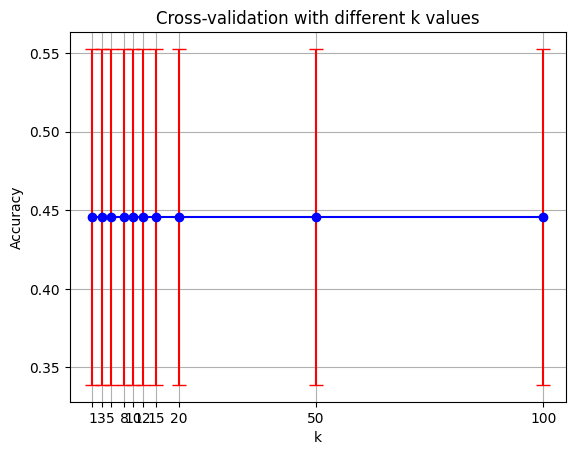

In [104]:
import matplotlib.pyplot as plt

# Define k_choices, k_to_accuracies, and num_folds (assuming they are already defined)

# Compute mean and standard deviation of accuracies for each k
mean_accuracies = [np.mean(k_to_accuracies[k]) for k in k_choices]
std_accuracies = [np.std(k_to_accuracies[k]) for k in k_choices]

# Plot mean accuracies with error bars
plt.errorbar(k_choices, mean_accuracies, yerr=std_accuracies, fmt='-o', color='b', ecolor='r', capsize=5)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Cross-validation with different k values')
plt.xticks(k_choices)
plt.grid(True)
plt.show()